In [ ]:
# Importando bibliotecas
import pandas as pd
from sklearn.datasets import load_iris

# Carregando o dataset Iris
iris = load_iris()

# Convertendo para DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Mostrando informações iniciais
print("Primeiras linhas do dataset:")
print(df.head())

print("\nInformações gerais do dataset:")
print(df.info())

print("\nEstatísticas descritivas:")
print(df.describe())

print("\nClasses do alvo (0 = Setosa, 1 = Versicolor, 2 = Virginica):")
print(iris.target_names)


Primeiras linhas do dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64


In [2]:
from sklearn.model_selection import train_test_split

# Separando em features (X) e alvo (y)
X = df.drop("target", axis=1)
y = df["target"]

# Dividindo em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("\nTamanhos dos conjuntos:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)



Tamanhos dos conjuntos:
X_train: (105, 4)
X_test: (45, 4)
y_train: (105,)
y_test: (45,)



Resultados de Acurácia:
Decision Tree: 0.9333
Matriz de Confusão:
[[15  0  0]
 [ 0 12  3]
 [ 0  0 15]]
Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

--------------------------------------------------
KNN: 0.9778
Matriz de Confusão:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg 

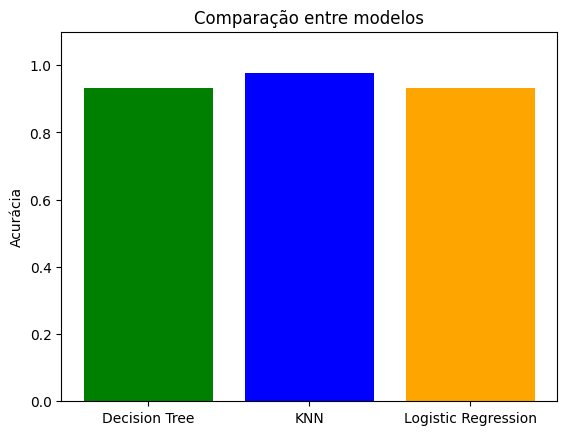

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Decision Tree
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)

# 2. KNN
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

# 3. Logistic Regression
model_log = LogisticRegression(max_iter=200)
model_log.fit(X_train, y_train)
y_pred_log = model_log.predict(X_test)

# Avaliando os modelos
models = {
    "Decision Tree": (y_pred_tree, accuracy_score(y_test, y_pred_tree)),
    "KNN": (y_pred_knn, accuracy_score(y_test, y_pred_knn)),
    "Logistic Regression": (y_pred_log, accuracy_score(y_test, y_pred_log))
}

print("\nResultados de Acurácia:")
for name, (pred, acc) in models.items():
    print(f"{name}: {acc:.4f}")
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, pred))
    print("Relatório de Classificação:")
    print(classification_report(y_test, pred, target_names=iris.target_names))
    print("-" * 50)

# Gráfico comparativo
scores = [acc for (_, acc) in models.values()]
labels = list(models.keys())

plt.bar(labels, scores, color=['green', 'blue', 'orange'])
plt.ylabel("Acurácia")
plt.title("Comparação entre modelos")
plt.ylim(0, 1.1)
plt.show()


In [ ]:
![Comparação entre modelos](Figure_1.png)